2:
Accuracy:
Application in the real world: manufacturing quality control
Justification: In situations when accurately detecting both positives and negatives is equally crucial, accuracy is optimal. For instance, maximizing overall efficiency in a production line involves making sure that both defective and non-defective goods are accurately identified. Fewer errors in classifying things as defective when they are not are guaranteed by a high accuracy rate, and vice versa.

Sensitivity (Recall):
Application in the real world: medical diagnostics for illnesses that could be fatal (e.g., cancer screening)
Justification: When the cost of missing a true positive is very high, sensitivity is crucial. False negative results from cancer screening can have disastrous repercussions if someone is not diagnosed with the disease. Even while a high sensitivity test may result in some false positives, it guarantees that the majority of disease cases are detected.

Specificity:
Use in the real world: filters for spam emails
Justification: When the cost of a false positive is significant, specificity is essential. When legitimate emails are mistakenly flagged as false positives in spam filtering, consumers may miss crucial messages. Even though some spam may evade detection, a high specificity guarantees that emails that are not spam are correctly detected.

Precision:
Use in the real world: identifying banking fraud
Justification: When reducing false positives is the main goal, accuracy is essential. When too many normal transactions are flagged as fraudulent (false positives) in fraud detection, for instance, it annoys customers and erodes their trust. The majority of transactions that are detected as fraudulent are guaranteed to be so by a high-precision mechanism.

In [11]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocess the dataset
ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height'])  # Drop unwanted columns
ab_reduced_noNaN = ab_reduced_noNaN.dropna()  # Drop rows with NaN values
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)  # Set Pub year to int
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)  # Set NumPages to int
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')  # Set Hard_or_Paper to category

# Display the first few rows of the preprocessed data
print(ab_reduced_noNaN.head())

# Summary statistics
print(ab_reduced_noNaN.describe(include='all'))

                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   
3       15.99         10.87             P       672    Harper Perennial   
4       30.50         16.77             P       720               Knopf   

   Pub year     ISBN-10  Thick  
0      2010  1605506249    0.8  
1      2008  1416564195    0.7  
2      1995

In [12]:
print(ab_reduced_noNaN['Hard_or_Paper'].value_counts())

# Summary statistics for numerical columns
print(ab_reduced_noNaN[['List Price', 'Pub year', 'NumPages']].describe())

Hard_or_Paper
P    233
H     86
Name: count, dtype: int64
       List Price     Pub year    NumPages
count  319.000000   319.000000  319.000000
mean    18.362978  2002.175549  334.272727
std     13.976755    10.646133  161.601510
min      1.500000  1936.000000   24.000000
25%     13.890000  1998.000000  208.000000
50%     15.000000  2005.000000  320.000000
75%     19.360000  2010.000000  416.000000
max    139.950000  2011.000000  896.000000


In [13]:
from sklearn.model_selection import train_test_split

# Define features and target
X = ab_reduced_noNaN[['List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Perform an 80/20 split with a random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Report sizes of training and test sets
print(f"Training set size: {len(X_train)} observations")
print(f"Test set size: {len(X_test)} observations")

Training set size: 255 observations
Test set size: 64 observations


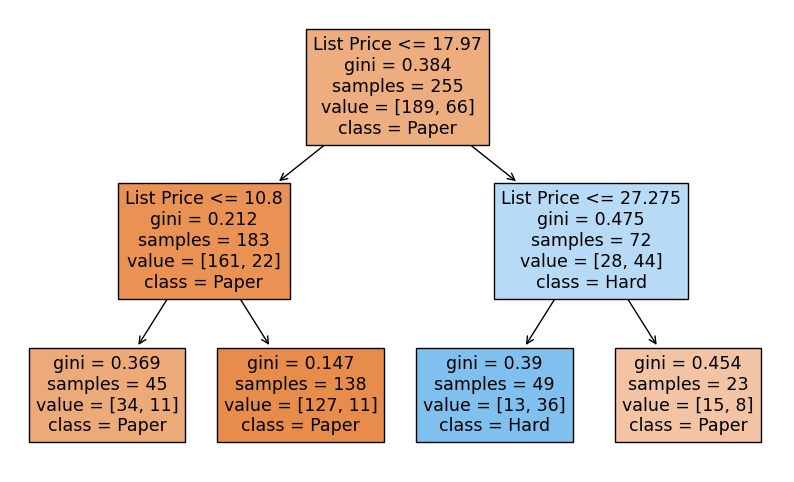

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Initialize and train the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paper', 'Hard'], filled=True)
plt.show()

4:
Explanation of y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
This line converts the categorical Hard_or_Paper column into dummy variables (H for Hard, P for Paper).
Selects the dummy variable corresponding to Hard books, resulting in a binary target (1 for Hard, 0 for Paper).
(4 is above as well)

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Define a second classifier with different parameters (for example, max_depth=3)
clf2 = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train clf2 using the training data
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score

# Predict on the test set using both models
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)

# Define helper functions for metrics
def compute_metrics(y_true, y_pred):
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    # Metrics
    sensitivity = TP / (TP + FN)  # True Positive Rate
    specificity = TN / (TN + FP)  # True Negative Rate
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    # Rounded values
    sensitivity = round(sensitivity, 3)
    specificity = round(specificity, 3)
    accuracy = round(accuracy, 3)
    
    return cm, sensitivity, specificity, accuracy

# Compute metrics for clf
cm_clf, sensitivity_clf, specificity_clf, accuracy_clf = compute_metrics(y_test, y_pred_clf)

# Compute metrics for clf2
cm_clf2, sensitivity_clf2, specificity_clf2, accuracy_clf2 = compute_metrics(y_test, y_pred_clf2)

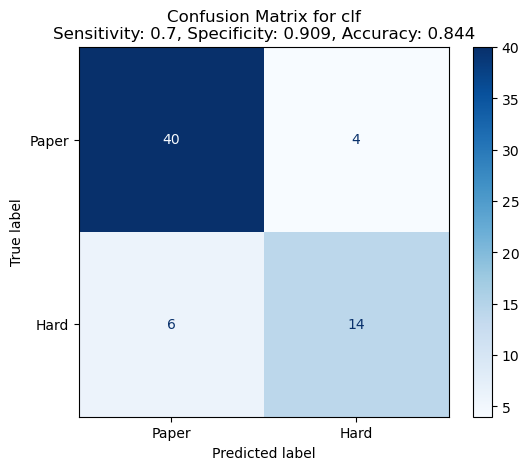

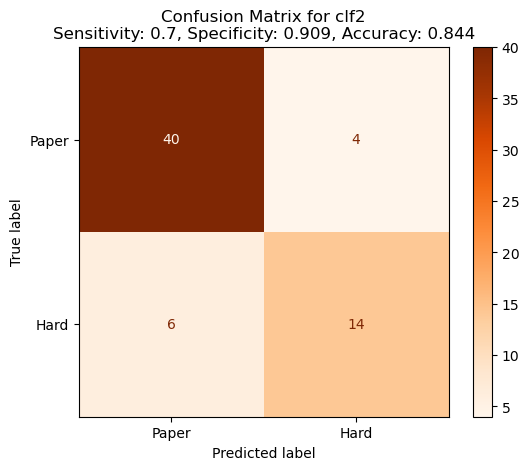

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Plot confusion matrix for clf
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paper', 'Hard'])
disp_clf.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for clf\nSensitivity: {sensitivity_clf}, Specificity: {specificity_clf}, Accuracy: {accuracy_clf}')
plt.show()

# Plot confusion matrix for clf2
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paper', 'Hard'])
disp_clf2.plot(cmap=plt.cm.Oranges)
plt.title(f'Confusion Matrix for clf2\nSensitivity: {sensitivity_clf2}, Specificity: {specificity_clf2}, Accuracy: {accuracy_clf2}')
plt.show()

In [21]:
print("Metrics for clf:")
print(f"Sensitivity: {sensitivity_clf}")
print(f"Specificity: {specificity_clf}")
print(f"Accuracy: {accuracy_clf}\n")

print("Metrics for clf2:")
print(f"Sensitivity: {sensitivity_clf2}")
print(f"Specificity: {specificity_clf2}")
print(f"Accuracy: {accuracy_clf2}")

Metrics for clf:
Sensitivity: 0.7
Specificity: 0.909
Accuracy: 0.844

Metrics for clf2:
Sensitivity: 0.7
Specificity: 0.909
Accuracy: 0.844


6:
Positive (Hard) and Negative (Paper):

Positive: Books classified as "Hard."
Negative: Books classified as "Paper."
Confusion Matrix:

TP (True Positive): Hard books correctly classified as Hard.
TN (True Negative): Paper books correctly classified as Paper.
FP (False Positive): Paper books misclassified as Hard.
FN (False Negative): Hard books misclassified as Paper.
Order of Arguments in confusion_matrix: confusion_matrix(y_true, y_pred): True labels (y_test) go first, followed by predicted labels (y_pred).

7:
The differences between the two confusion matrices stem from the features used to train the clf model. In the first confusion matrix, the classifier only uses the List Price feature to predict the outcome, which may result in less discriminative power compared to the second model. In the second case, the model uses multiple features (NumPages, Thick, and List Price), which likely allows for a more nuanced understanding of the data, potentially improving classification accuracy and providing a better decision boundary.

The confusion matrices for clf and clf2 are better because they use feature subsets or hyperparameters that were specifically chosen to enhance predictive performance, leading to more balanced results with fewer misclassifications (false positives and false negatives). The use of a richer set of features and a tuned model typically improves the model's ability to generalize and perform more robustly across different data points.

Link to ChatGPT: https://chatgpt.com/c/673fbf83-7434-800f-a279-80fbabc6696f